## MODEL CREATION & EVALUATION

### MODEL:
- K-MEANS CLUSTERINGm

### LOAD DATA

- Here we are used PCA data

In [2]:
import pandas as pd
data = pd.read_csv("PCA_DATA.csv")
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,15.457910,1.970933,-0.127109,1.245770,0.292933,2.606723,2.050659,-0.313811,0.706056,0.287503
1,14.499303,2.579694,-0.087924,1.460932,1.355166,2.141632,1.915058,0.534549,0.771055,0.385453
2,8.525502,3.366463,-0.935640,0.974871,1.135822,2.192465,2.284827,0.295146,0.648785,0.073268
3,-1.791257,-1.366833,-0.823411,0.942989,0.671947,1.593489,0.847568,-0.074798,-0.091278,0.273977
4,14.442166,1.785358,-0.369839,0.776535,0.970577,1.640868,1.535269,-0.185057,0.623712,0.125529


## MODEL:
- K-MEANS CLUSTERINGm

#### DEFINE INDEPENDANT FEATURE

In [3]:
#Step:1 Define independant veriable
X = data
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,15.457910,1.970933,-0.127109,1.245770,0.292933,2.606723,2.050659,-0.313811,0.706056,0.287503
1,14.499303,2.579694,-0.087924,1.460932,1.355166,2.141632,1.915058,0.534549,0.771055,0.385453
2,8.525502,3.366463,-0.935640,0.974871,1.135822,2.192465,2.284827,0.295146,0.648785,0.073268
3,-1.791257,-1.366833,-0.823411,0.942989,0.671947,1.593489,0.847568,-0.074798,-0.091278,0.273977
4,14.442166,1.785358,-0.369839,0.776535,0.970577,1.640868,1.535269,-0.185057,0.623712,0.125529


### MODEL BUILDING
#### 1. K-MEANS CLUSTERING

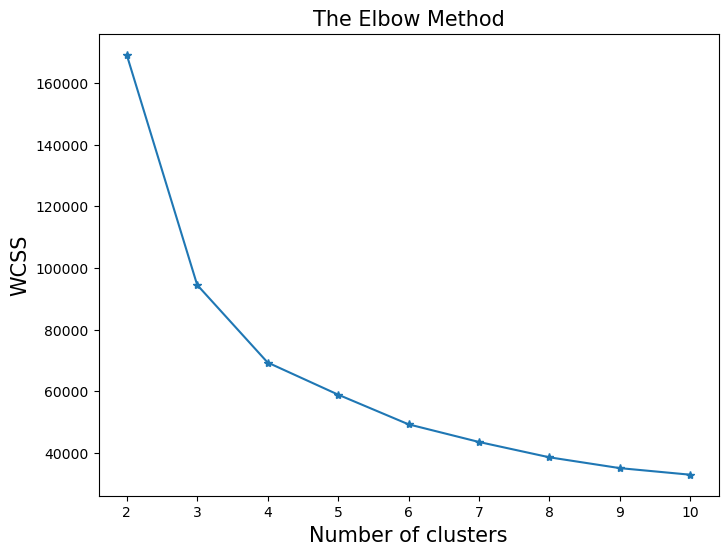

In [5]:
# Step:2 Initalize the k value
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.show()

- From above plot we are select 3 cluster because of odd no and more variance

In [7]:
# Step:3 initalize the cluster
kmeans = KMeans(n_clusters=3,random_state=45)

# Step:4 Fitting the data
kmeans.fit(X)

# Step:5  Get labels
kmeans.labels_

# Step:6 Print dataset with labels
data['cluster'] = pd.DataFrame(kmeans.labels_)
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,cluster
0,15.457910,1.970933,-0.127109,1.245770,0.292933,2.606723,2.050659,-0.313811,0.706056,0.287503,1
1,14.499303,2.579694,-0.087924,1.460932,1.355166,2.141632,1.915058,0.534549,0.771055,0.385453,1
2,8.525502,3.366463,-0.935640,0.974871,1.135822,2.192465,2.284827,0.295146,0.648785,0.073268,2
3,-1.791257,-1.366833,-0.823411,0.942989,0.671947,1.593489,0.847568,-0.074798,-0.091278,0.273977,0
4,14.442166,1.785358,-0.369839,0.776535,0.970577,1.640868,1.535269,-0.185057,0.623712,0.125529,1


In [8]:
# Step:7 initalize the centroids
kmeans.cluster_centers_

array([[-3.03262714e+00, -6.93042311e-02, -1.11611909e-02,
         3.56130795e-04,  3.95700910e-03,  2.45060847e-03,
         5.03811480e-03,  1.27834322e-02,  7.15050308e-03,
         2.04060545e-03],
       [ 1.34761844e+01, -2.36265700e-01, -3.18117122e-02,
        -1.75105774e-03,  3.59705385e-02, -1.98996820e-02,
         2.78986475e-03,  6.68304678e-03,  4.52294588e-02,
         5.61488879e-03],
       [ 4.43879889e+00,  3.76039138e-01,  5.74122613e-02,
        -4.36239493e-04, -3.28132758e-02,  9.59101211e-04,
        -2.00779798e-02, -5.07450432e-02, -4.93194647e-02,
        -1.03951608e-02]])

In [9]:
labels = kmeans.labels_
labels

# Step:9 import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.6253040718562628


### CLUSTER

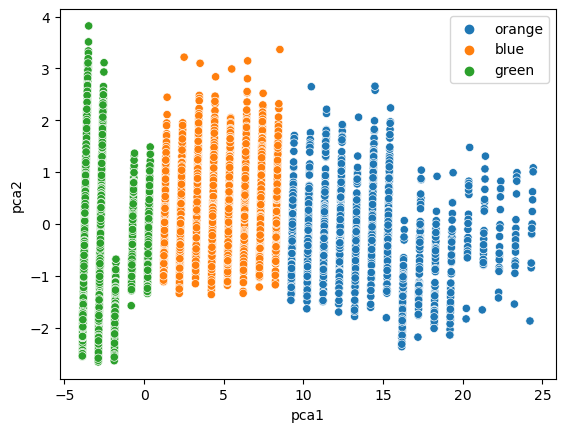

In [13]:
import numpy as np
import seaborn as sns
color = np.array(['green', 'orange', 'blue'])
sns.scatterplot(x=data.pca1, y=data.pca2, hue=color[kmeans.labels_])
plt.show()

## MODEL SAVING

In [14]:
import pickle
file = open("clustering_model.pkl","wb")
pickle.dump(kmeans,file)

#### ---------------------------------------------------------------------------------------------- Thank You ------------------------------------------------------------------------------------------